## Series augmentation

Final aim of the project was to use data I processed for ML purposes. It was not certain whether we would receive medical records of more patients. For this reason I made an attempt to data augmentation.\
Generating multiple series on the basis of just one original series would for sure not replace real diversity of vital signs series. Additional real series would most likely contain different anomalies patterns. 
Augmentation method used in this notebook bases on altering the original series. Alteration was done by performing Fast Fourier Transform of the series, adding a random noise to frequency spectrum and performing Reverse Fast Fourier Transform to achieve modified series.

Augmentation method was proposed by my engineering thesis supervisor. He was the author of initial script which I modified to perform final augmentation task. He was the author of functions used for visualization.

Result of this step I a dataset consisting of selected number of augmented time series created on the basis of the original one. The idea was to use artificially created data as placeholder for real patients' data that were beyond our rich.
Example below is performed using pulse series.

In preceding notebooks one example augmented series is used to examine Neural Network behavior when fed with such data (suitability of augmentation method).

In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append('../modules/')
from modules.augmentation_funs import fourier_augment_dc, plot_overlay_multiple, residual_plot_multiple

In [2]:
np.random.seed(0)

In [3]:
#wybrane parametry: puls, saturacja, oddechy_calkowite/cisnienie
df = pd.read_csv('../data/df_stl_interpolated.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')
df.head(2)

,date,puls,RR_skurczowe,RR_rozkurczowe,saturacja_prc,CVP_srednie,odd_wymuszane,odd_calkowite
0,2023-11-13 14:00:00,125,65,40,100.0,23.0,25.0,25.0
1,2023-11-13 15:00:00,130,90,50,100.0,20.0,25.0,25.0


In [4]:
param = 'puls'
blur_rate = 2
# time = df.index 
time = df['date']
original_series = df[param]

In [5]:
original_series.name

'puls'

In [6]:
"""augumentation"""
# num_of_augmented_series = 10000
num_of_augmented_series = 10

#noise factor to jest std tego noise
noise_factor= (max(original_series) - min(original_series)) * blur_rate
augmented_series_list = [fourier_augment_dc(original_series, noise_factor=noise_factor) for _ in range(num_of_augmented_series)]

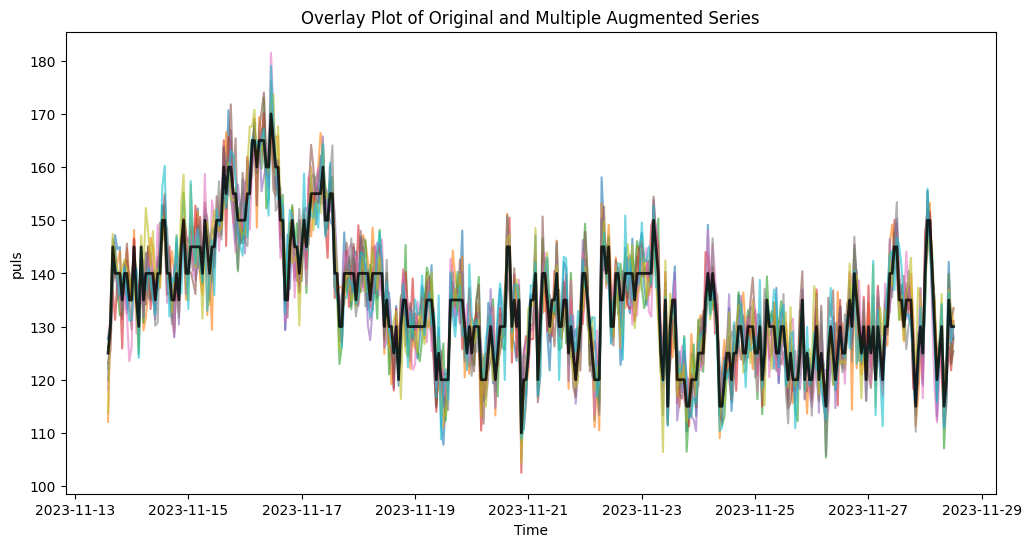

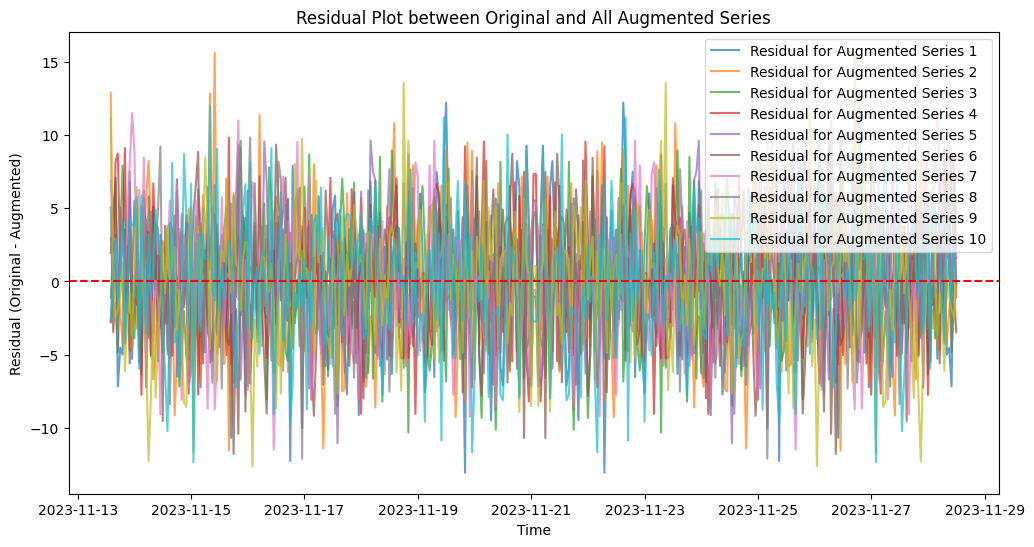

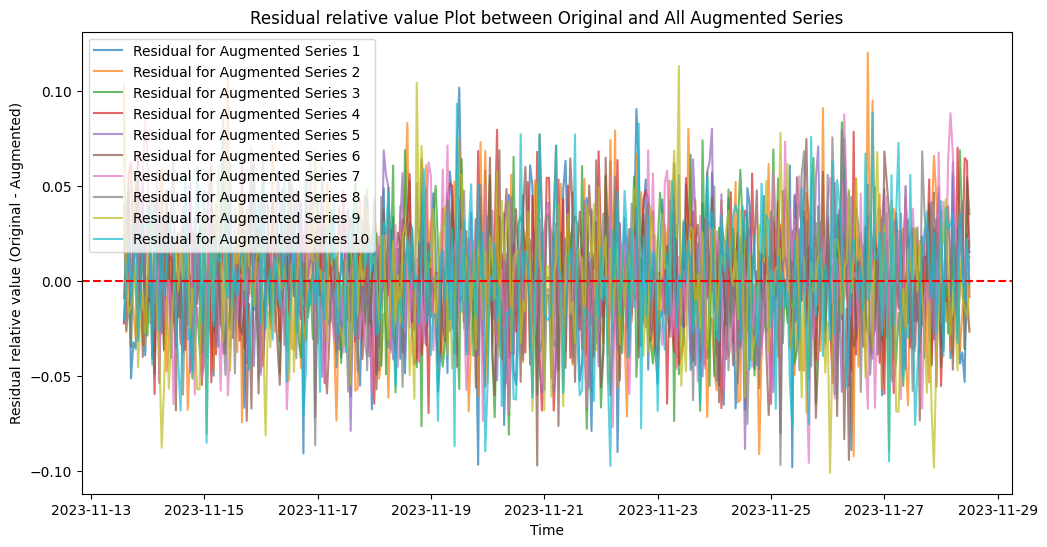

Original Mean: 134.8050139275766
Augmented Mean: 134.8050139275766
Original Variance: 127.26003057083666
Augmented Variance: 145.13189901301976


In [7]:
saving_path = '../images/08_FTT_aug/' + param + '_overlay_plot_' + str(num_of_augmented_series) + '_series.png'
plot_overlay_multiple(original_series, augmented_series_list, time, saving_path)
residual_plot_multiple(original_series, augmented_series_list, time)

print("Original Mean:", np.mean(original_series))
print("Augmented Mean:", np.mean(augmented_series_list))
print("Original Variance:", np.var(original_series))
print("Augmented Variance:", np.var(augmented_series_list))

In [8]:
# for i in range(len(augmented_series_list)):
#     df_augmented[f"aug_series_{i:03d}"] = augmented_series_list[i]
df_list = [pd.DataFrame({f"aug_series_{i + 1:05d}": augmented_series_list[i]}) for i in range(len(augmented_series_list))]
df_augmented = pd.concat(df_list, axis=1)
df_augmented = df_augmented.map(round)
df_augmented.set_index(time, inplace = True)

In [9]:
df_augmented.head()

,aug_series_00001,aug_series_00002,aug_series_00003,aug_series_00004,aug_series_00005,aug_series_00006,aug_series_00007,aug_series_00008,aug_series_00009,aug_series_00010
date,,,,,,,,,,
2023-11-13 14:00:00,122,112,126,128,128,123,118,120,114,128
2023-11-13 15:00:00,128,134,128,131,128,125,127,133,130,130
2023-11-13 16:00:00,142,144,138,137,143,138,142,147,147,142
2023-11-13 17:00:00,147,139,145,131,142,140,140,145,142,141
2023-11-13 18:00:00,145,142,137,139,137,139,139,135,141,139


In [10]:
df_augmented.to_csv('../data/df_augmented_'+ param + '.csv', index=True)